# Datenstrukturen und Algorithmen

## Praktische Aufgabe 5

In dieser Praktischen Aufgabe werden Sie sich mit Graphalgorithmen beschäftigen. Dazu werden Sie einerseits den Algorithmus von Dijkstra implementieren und andererseits mit Hilfe von `networkx` Labyrinthe generieren und lösen. Bei `networkx` handelt es sich um ein Paket welches das Erstellen, Bearbeiten und Analysieren von Graphen erlaubt.

Die Abgaben werden mit der `nbgrader` Erweiterung korrigiert. Das System erwartet, dass der Code zum Lösen der Aufgaben nach der `#YOUR CODE HERE` Anweisung kommt. Außerdem darf die Zellenreihenfolge nicht geändert werden. Damit Sie selbst Ihre Lösungsvorschläge validieren können, werden Ihnen Unittests zur Verfügung gestellt. Beachten Sie, dass diese Tests keine Garantie sind für das Erreichen der vollen Punktzahl, da Sie nur einen Teil der Funktionalität überprüfen.

Wichtig: Füllen Sie zunächst die erste Zelle mit `#YOUR ANSWER HERE` unter dem Titel `Abgabeteam` mit ihren Namen und Matrikelnummern vollständig aus. Dies ermöglicht uns auch bei technischen Problemen die Abgaben eindeutig zuordnen zu können. Ändern Sie außerdem nicht den Namen der Datei. 

**Übersicht der Aufgaben** (20 Punkte):

1. **Implementierung von Dijkstra** - insgesamt: 10 Punkte
   - initialize_single_source() - 2P.
   - relax() - 3P.
   - dijkstra() - 5P.
2. **Labyrinthe: Generieren und Lösen** - insgesamt: 10 Punkte
   - generate_maze() - 6P.
   - solve_maze() - 4P.

## Abgabeteam
Bitte füllen Sie die untenstehende Zelle aus mit 

Nummer des Tutoriums,

Voranme Nachname Matrikelnummer 1,

Vorname Nachname Matrikelnummer 2,

(Vorname Nachname Matrikelnummer 3)

23,

Mohammed Al-Laktah 419664,

Salah Atallah 414867,

## Module importieren
Zuerst werden die benötigten Module importiert und weitere Hilfsfunktionen definiert. Sie dürfen keine weiteren Module impotieren.

Wenn in Ihrer Entwickungsumbegung (z.B Google Colab oder Deepnote) bestimmte Module nicht verfügbar sind, dann kommentieren Sie die erste Zeile aus um die Module in der Umgebung zu installieren.

In [110]:
#!pip install nose
#!pip install networkx
from random import randint
from nose.tools import assert_equal
from networkx import draw_networkx_nodes, draw_networkx_edges, grid_2d_graph, shortest_path
from networkx.algorithms.tree import minimum_spanning_tree


# unittests helper functions
import pickle

def save_data(idx, name, data):
    with open(f'data/{idx}/{name}.pkl', 'wb') as f:
        pickle.dump(data, f)

def load_data(idx, name):
    with open(f'data/{idx}/{name}.pkl', 'rb') as f:
        return pickle.load(f)

# Algorithmus von Dijkstra

Implementieren Sie den Algorithmus von Dijkstra indem Sie die folgenden Funktionen nacheinander implementieren: `initialize_single_source()`, `relax()` und `dijkstra()`. Orientieren Sie sich bei ihrer Implementierung an dem in der Vorlesung vorgestellten Code. 

Der untenstehende Code definiert die Klasse `Graph`. In dieser Klasse wird ein Graph als Adjazenzliste dargestellt. Sie können direkt über `G.Adj` auf die Adjazenzliste oder über `G.V` auf die Knoten des Graphen zugreifen.

Die Funktion `extract_minimum()` wird Ihnen zur Verfügung gestellt. Beachten Sie, dass hier in jedem Extract-Schritt eine Sortierung aller verbliebenen Elemente vorgenommen wird. In der Praxis würde diese Funktion über einen Min-Heap effizient implementiert werden. Um die Implementierung kurz und übersichtlich zu gestalten, wird hier auf Effizienz zu Gunsten der Lesbarkeit verzichtet.

In [111]:
class Graph:
    def __init__(self, adjazencyList):
        self.Adj = adjazencyList

    @property
    def V(self):
        return list(self.Adj.keys())


def extract_minimum(Q, key):
    Q = {u: key[u] for u in Q}
    Q = sorted(Q.items(), key=lambda i: i[1])
    Q = [u for u, k in Q]
    return Q[0], Q[1:]

In [112]:
A = {
    'a': ['b', 'c'],
    'b': ['a', 'c', 'e'],
    'c': ['a', 'b', 'd', 'f'],
    'd': ['c', 'e', 'f'],
    'e': ['b', 'd', 'g', 'h'],
    'f': ['c', 'd', 'h'],
    'g': ['e', 'h', 'i'],
    'h': ['e', 'f', 'g', 'i'],
    'i': ['g', 'h']
}
G = Graph(A)

print("Knoten:")
print(G.V)

print("Adjazenzliste:")
print(G.Adj)

Knoten:
['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']
Adjazenzliste:
{'a': ['b', 'c'], 'b': ['a', 'c', 'e'], 'c': ['a', 'b', 'd', 'f'], 'd': ['c', 'e', 'f'], 'e': ['b', 'd', 'g', 'h'], 'f': ['c', 'd', 'h'], 'g': ['e', 'h', 'i'], 'h': ['e', 'f', 'g', 'i'], 'i': ['g', 'h']}


## a) initialize_single_source() - 2P.

Zuerst soll die Funktion `initialize_single_source()` implementiert werden. Als Eingabe erwartet sie den Graphen `G`, sowie den Startknoten `s`. Die Funktion erstellt zwei Dictionaries die für jeden Knoten aus aus `G` einen Wert initialisieren. Im ersten Dictionary sollen die Distanzen zum Startknoten gespeichert werden. Initialisieren Sie alle Einträge bis auf den Startknoten mit `float("Inf")`. Die Distanz des Startknotens wird mit 0 initialisiert. Das zweite Dictionary soll jeweils einen Verweis auf seine Vorgänger speichern. Initialisieren Sie hier alle Einträge vorerst mit `None`. Am Ende gibt die Funktion als erstes das Dictionary mit den Distanzen und als zweites das Dictionary mit den Vorgängern zurück. 

In [113]:
def initialize_single_source(G, s):
    distance = dict()
    predecessor = dict()

    for key in G.V:
        distance[key] = float('inf')
        if key == s:
            distance[key] = 0
        
        predecessor[key] = None
    
    return distance, predecessor

## a) Tests

In [114]:
# unittests

In [115]:
#helper functions
def load_data_initialize_single_source(idx):
    A = load_data(idx, "A")
    s = load_data(idx, "s")
    d = load_data(idx, "d")
    p = load_data(idx, "p")
    return A, s, d, p

def test_initialize_single_source(A, s, d, p):
    print("source is vertex:", s)
    G = Graph(A)
    d_out, p_out = initialize_single_source(G, s)
    assert_equal(d, d_out)
    assert_equal(p, p_out)

In [116]:
test_initialize_single_source(*load_data_initialize_single_source(1))

source is vertex: a


In [117]:
test_initialize_single_source(*load_data_initialize_single_source(2))

source is vertex: c


In [118]:
test_initialize_single_source(*load_data_initialize_single_source(3))

source is vertex: f


## b) relax() - 3P.

Implementieren Sie die Funktion `relax()`, die für zwei gegebene Knoten `u` und `v` vergleicht, ob der Weg von dem Startknoten über `u` nach `v` kürzer ist, als der bisher kürzeste Weg von dem Startknoten zu `v`. Falls dies der Fall ist, so wird dieser Weg ausgewählt und die neue Distanz im Distanz-Dictionary `d` für den Knoten `v` gespeichert. Zusätzlich speichern wir in dem Vorgänger-Dictionary `p` den neuen Vorgänger-Knoten. Die Distanzen zwischen den Knoten werden durch die Gewichte `w` beschrieben.

In [119]:
def relax(u, v, w, p, d):
    if (u, v) in w and d[u] + w[(u, v)] < d[v]:
        d[v] = d[u] + w[(u, v)]
        p[v] = u

## b) Tests

In [120]:
# unittests

In [121]:
def load_data_relax(idx):
    u = load_data(idx, "u")
    v = load_data(idx, "v")
    w = load_data(idx, "w")
    p_1 = load_data(idx, "p_1")
    d_1 = load_data(idx, "d_1")
    p_2 = load_data(idx, "p_2")
    d_2 = load_data(idx, "d_2")
    return u, v, w, p_1, d_1, p_2, d_2

def test_relax(u, v, w, p_1, d_1, p_2, d_2):
    relax(u, v, w, p_1, d_1)

    print("p_groundtruth:", p_2)
    print("p            :", p_1)

    print("---------------------")

    print("d_groundtruth:", d_2)
    print("d            :", d_1)

    assert_equal(p_1, p_2)
    assert_equal(d_2, d_2)
    print("-- > correct!")

In [122]:
test_relax(*load_data_relax(11))

p_groundtruth: {'a': None, 'b': 'a', 'c': None}
p            : {'a': None, 'b': 'a', 'c': None}
---------------------
d_groundtruth: {'a': 0, 'b': 5, 'c': inf}
d            : {'a': 0, 'b': 5, 'c': inf}
-- > correct!


In [123]:
test_relax(*load_data_relax(22))

p_groundtruth: {'a': None, 'b': 'a', 'c': None, 'd': None}
p            : {'a': None, 'b': 'a', 'c': None, 'd': None}
---------------------
d_groundtruth: {'a': 0, 'b': 5, 'c': inf, 'd': inf}
d            : {'a': 0, 'b': 5, 'c': inf, 'd': inf}
-- > correct!


In [124]:
test_relax(*load_data_relax(33))

p_groundtruth: {'a': None, 'b': 'a', 'c': 'a', 'd': None}
p            : {'a': None, 'b': 'a', 'c': 'a', 'd': None}
---------------------
d_groundtruth: {'a': 0, 'b': 5, 'c': 5, 'd': inf}
d            : {'a': 0, 'b': 5, 'c': 5, 'd': inf}
-- > correct!


## c) dijkstra() - 5P.

Implementieren Sie abschließen die Funktion `dijkstra()`, die den Algorithmus von Dijkstra implementiert, um den kürzesten Weg von einem Knoten `s` zu jedem anderen Knoten in dem Graphen `G` zu berechnen. Zusätzlich bekommt die Funktion die positiven Kantengewichte `w` übergegeben. Orientieren Sie sich an dem in der Vorlesung vorgestellten Code.

Hinweis: Sie dürfen die zuvor implementierten Funktionen `initialize_single_source()`, `extract_minimum()`, sowie `relax()` verwenden.

In [125]:
def dijkstra(G, w, s):
    distance, predecessor = initialize_single_source(G, s)
    
    Q = G.V
    
    while Q != []:
        u, Q = extract_minimum(Q, distance)
        for v in G.Adj[u]:
            relax(u, v, w, predecessor, distance)
    
    return distance, predecessor

## c) Tests

In [126]:
def load_data_dijkstra(idx):
    A = load_data(idx, "A")
    w = load_data(idx, "w")
    s = load_data(idx, "s")
    d = load_data(idx, "d")
    p = load_data(idx, "p")
    return A, w, s, d, p

def test_dijkstra(A, w, s, d, p):
    print("A:", A)
    print("s:", s)
    print("====================")
    G = Graph(A)
    d_out, p_out = dijkstra(G, w, s)

    print("d_ground_truth:", d)
    print("d             :", d_out)
    print("--------------------")
    print("p_ground_truth:", p)
    print("p             :", p_out)

    assert_equal(d, d_out)
    assert_equal(p, p_out)

In [127]:
test_dijkstra(*load_data_dijkstra(111))

A: {'a': ['b', 'c'], 'b': ['a', 'c'], 'c': ['a', 'b', 'd'], 'd': ['c']}
s: a
d_ground_truth: {'a': 0, 'b': 5, 'c': 7, 'd': 22}
d             : {'a': 0, 'b': 5, 'c': 7, 'd': 22}
--------------------
p_ground_truth: {'a': None, 'b': 'a', 'c': 'a', 'd': 'c'}
p             : {'a': None, 'b': 'a', 'c': 'a', 'd': 'c'}


In [128]:
#c can not be reached starting from a
test_dijkstra(*load_data_dijkstra(222))

A: {'a': ['b'], 'b': ['a'], 'c': ['a']}
s: a
d_ground_truth: {'a': 0, 'b': 5, 'c': inf}
d             : {'a': 0, 'b': 5, 'c': inf}
--------------------
p_ground_truth: {'a': None, 'b': 'a', 'c': None}
p             : {'a': None, 'b': 'a', 'c': None}


In [129]:
#a only has outgoing edges and d has only incoming edges
test_dijkstra(*load_data_dijkstra(333))

A: {'a': ['b', 'c'], 'b': ['d'], 'c': ['d'], 'd': []}
s: a
d_ground_truth: {'a': 0, 'b': 5, 'c': 5, 'd': 6}
d             : {'a': 0, 'b': 5, 'c': 5, 'd': 6}
--------------------
p_ground_truth: {'a': None, 'b': 'a', 'c': 'a', 'd': 'b'}
p             : {'a': None, 'b': 'a', 'c': 'a', 'd': 'b'}


# Labyrinthe: Generieren und Lösen

In dieser Aufgabe werden Sie verschiedene Algorithmen nutzen, um einfache Labyrinthe automatisch zu erzeugen und anschließend zu lösen. Sie dürfen in dieser Teilaufgabe Funktionen aus dem Package `networkx` verwenden, das verschiedene Algorithmen auf Graphen implementiert. Machen Sie sich zunächst mit `networkx` vertraut. Der untenstehende Code `visualize_maze()` implementiert die Visualisierung. Schwarze Linien stellen hier Pfade dar. Der Start `s` ist grün und das Ziel `t` ist rot markiert. Falls eine Lösung `p` übergeben wurde, wird dieser Weg als eine blaue Linie gezeichnet.

In [130]:
def visualize_maze(G, s, t, p = None):
    # draw all edges of G
    n_size = 5000 / G.number_of_nodes()
    pos = dict( (n, n) for n in G.nodes() )
    draw_networkx_edges(G, pos=pos)

    # draw the source node in green
    S = G.subgraph(s)
    draw_networkx_nodes(S, pos, node_color="green", node_size=n_size)

    # draw the target node in red
    T = G.subgraph(t)
    draw_networkx_nodes(T, pos, node_color="red", node_size=n_size)

    if p is not None:
        P = G.subgraph(p)
        draw_networkx_edges(P, pos, edge_color="blue", width=2)

## a) create_maze() - 6P.

Implementieren Sie die Funktion `create_maze()`, die ein zufälliges Labyrinth erstellt. Hierbei kann die Größe des Labyrinths über die zwei Eingabeparameter `horizontal_size` und `vertical_size` bestimmt werden. Das Erstellen des Labyrinths soll dabei wie folgt funktionieren: 

- Erstellen Sie einen regulären Graphen mit Hilfe der Funktion `grid_2d_graph()`.
- Weisen Sie den Kanten zufällige Gewichte zu. Nutzen Sie dazu die Funktion `G.edges(data=True)`, die eine Liste von Tripeln der Form (node1, node2, edge) zurück gibt. Sie können auf die Gewichte zugreifen und sie verändern mit: `edge['weight']`. 
- Berechnen Sie den minimalen Spannbaum (MST = Minimum Spanning Tree) mit Hilfe der Funktion `minimum_spanning_tree()`. Hierbei soll der Startknoten in einer Ecke liegen und der Zielknoten in der gegenüberliegenden Ecke. Sie können hier z.B. den ersten und letzten Knoten im Graphen als Start- und Zielknoten wählen.

Die Funktion soll das Labyrinth als einen Graphen, sowie den Start- und Zielknoten zurückgeben.

Hinweis: Lesen Sie die Dokumentation von `networkx`, um mehr über die verwendeten Funktionen zu erfahren.

In der folgenden Abbildung sehen Sie wie ein 4x4 Labyrinth in vier Schritten erstellt wird. Zunächst wird der Graph erstellt, dann werden zufällige Kantengewichte generiert, anschließend ein MST berechnet und letztendlich die Start- und Zielknoten ausgewählt:

![create_maze_example](img/create_maze_example.png)

In [131]:
def create_maze(horizontal_size = 4, vertical_size=4):
    # YOUR CODE HERE
    grid = grid_2d_graph(horizontal_size, vertical_size)
    edges = [edge[2] for edge in grid.edges(data=True)]

    for edge in edges:
        edge['weight'] = randint(1, 101)
    
    mst = minimum_spanning_tree(grid)
    
    return mst, (0,0), (horizontal_size-1, vertical_size-1)

## a) Tests

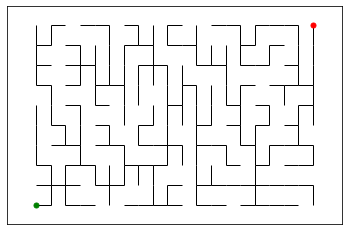

In [132]:
# unittests
G, s, t = create_maze(20, 10)
visualize_maze(G, s, t)

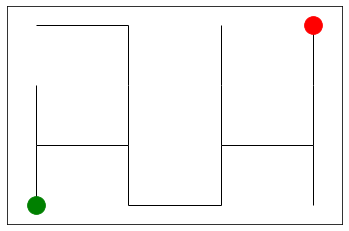

In [133]:
# unittests
G, s, t = create_maze(4, 4)
visualize_maze(G, s, t)

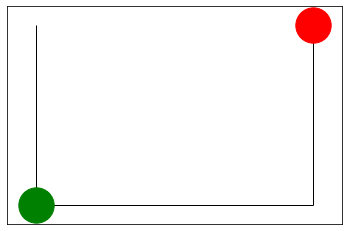

In [134]:
# unittests
G, s, t = create_maze(2, 2)
visualize_maze(G, s, t)

In [135]:
# unittests

In [136]:
# unittests

In [137]:
# unittests

## b) solve_maze() - 4P.

Implementieren Sie die Funktion `solve_maze()`, die ein Labyrinth mit einem gegebenen Start- und einem Ziel-Knoten löst. Die Funktion soll eine Liste von Knoten, die den kurzestem Weg zwischen dem Start und dem Ziel beschreiben (inklusive des Start- und Ziel-Knotens) zurückgeben. Zusätzlich soll die Funktion die Länge des kürzesten Pfades zurückgeben. Der Abstand zwischen zwei direkt benachbarten Knoten auf dem Gitter beträgt hierbei immer `1`.

Hinweis: Verwenden Sie die Funktion `shortest_path()` in Ihrer Implementierung, um den kürzesten Pfad zu berechnen.

In der folgenden Abbildung sehen Sie den kürzesten Weg für ein zufälliges 300x150 Labyrinth mit einer Pfadlänge von 1191:
![solve_maze_example](img/solve_maze_example.png)

In [138]:
def solve_maze(G, s, t):
    sp = shortest_path(G, s, t)
    return sp, len(sp) - 1

## b) Tests

In [139]:
def test_random_maze(horizontal, vertical):
    maze, begin, end = create_maze(horizontal, vertical)
    path, path_length = solve_maze(maze, begin, end)
    visualize_maze(maze, begin, end, path)
    return path_length


def test_solve_maze(maze, begin, end, path):
    path_length = len(path) - 1
    path_out, path_length_out = solve_maze(maze, begin, end)
    visualize_maze(maze, begin, end, path_out)
    assert_equal(path_length, path_length_out)
    assert_equal(path_out, path)
    

def load_data_maze(idx):
    maze = load_data(idx, "maze")
    path = load_data(idx, "path")
    begin = path[0]
    end = path[-1]
    return maze, begin, end, path


19

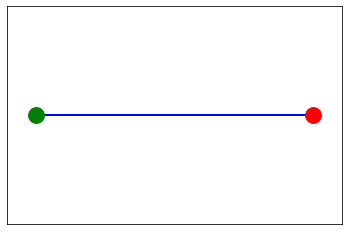

In [140]:
test_random_maze(20, 1)

10

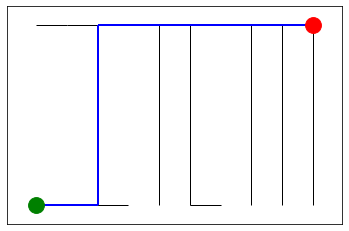

In [141]:
test_random_maze(10, 2)

26

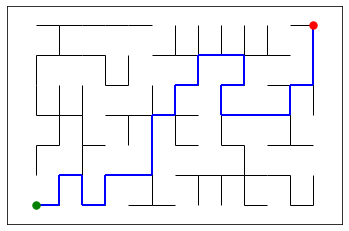

In [170]:
test_random_maze(13, 7)

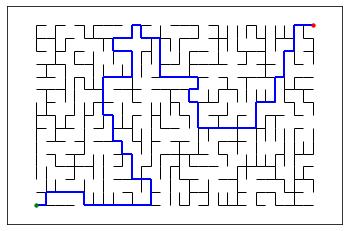

In [156]:
test_solve_maze(*load_data_maze(1111))

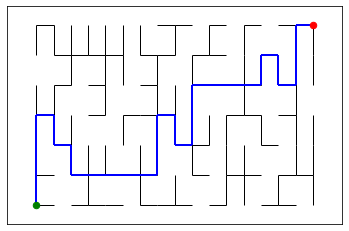

In [144]:
test_solve_maze(*load_data_maze(2222))


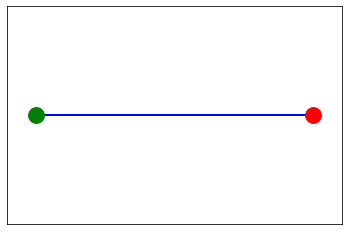

In [145]:
test_solve_maze(*load_data_maze(3333))

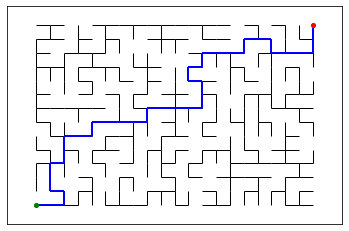

In [146]:
test_solve_maze(*load_data_maze(4444))

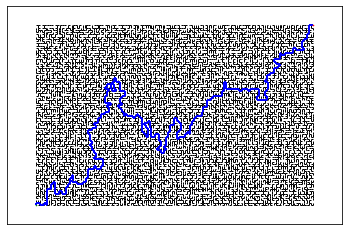

In [147]:
test_solve_maze(*load_data_maze(5555))

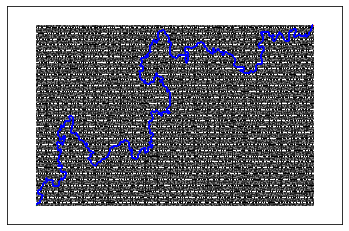

In [148]:
test_solve_maze(*load_data_maze(6666))

## Jupyter Notebook Stolperfalle
Bei der Benutzung von Jupyter Notebooks, wird der globale Zustand aller Variablen zwischen der Ausführung von verschiedenen Zellen erhalten. Dies ist auch der Fall, wenn Zellen gelöscht oder hinzugefügt werden.
Um sicher zu gehen, dass nicht ausversehen notwendige Variablen überschrieben oder gelöscht wurden, kann der Befehl `Kernel -> Restart & Run All` ausgeführt werden.